In [1]:
# Pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import xlrd
import csv
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
#py.sign_in('sales.leonardo', 'Nb2VB3H35kkX7cdsn08x')
import cufflinks as cf
from math import pi
import pickle

#### Carregando tabela de escolas do Censo Escolar

In [2]:
df_censo_2017 = pd.read_csv("planilhas/censo_escolar/ESCOLAS.csv", sep = "|", encoding = "ISO-8859-1", low_memory=False)
df_censo_2017 = df_censo_2017[['CO_ENTIDADE', 'TP_SITUACAO_FUNCIONAMENTO', 'CO_UF', 'CO_MUNICIPIO', 'TP_DEPENDENCIA', 'TP_LOCALIZACAO', 'IN_AGUA_FILTRADA', 'IN_AGUA_REDE_PUBLICA', 'IN_AGUA_POCO_ARTESIANO', 'IN_AGUA_CACIMBA', 'IN_AGUA_FONTE_RIO', 'IN_AGUA_INEXISTENTE', 'IN_ENERGIA_REDE_PUBLICA', 'IN_ENERGIA_GERADOR', 'IN_ENERGIA_OUTROS', 'IN_ENERGIA_INEXISTENTE', 'IN_ESGOTO_REDE_PUBLICA', 'IN_ESGOTO_FOSSA', 'IN_ESGOTO_INEXISTENTE', 'IN_LIXO_COLETA_PERIODICA', 'IN_LIXO_QUEIMA', 'IN_LIXO_JOGA_OUTRA_AREA', 'IN_LIXO_RECICLA', 'IN_LIXO_ENTERRA', 'IN_LIXO_OUTROS', 'IN_SALA_DIRETORIA', 'IN_SALA_PROFESSOR', 'IN_LABORATORIO_INFORMATICA', 'IN_LABORATORIO_CIENCIAS', 'IN_QUADRA_ESPORTES_COBERTA', 'IN_QUADRA_ESPORTES_DESCOBERTA', 'IN_COZINHA', 'IN_BIBLIOTECA', 'IN_SALA_LEITURA', 'IN_PARQUE_INFANTIL', 'IN_BANHEIRO_FORA_PREDIO', 'IN_BANHEIRO_DENTRO_PREDIO', 'IN_REFEITORIO', 'IN_DESPENSA', 'IN_ALMOXARIFADO', 'IN_AUDITORIO', 'IN_PATIO_COBERTO', 'IN_PATIO_DESCOBERTO', 'NU_SALAS_EXISTENTES', 'NU_SALAS_UTILIZADAS', 'NU_EQUIP_TV', 'NU_EQUIP_DVD', 'NU_EQUIP_RETROPROJETOR', 'NU_EQUIP_IMPRESSORA', 'NU_EQUIP_SOM', 'NU_EQUIP_MULTIMIDIA', 'NU_COMPUTADOR', 'NU_COMP_ADMINISTRATIVO', 'NU_COMP_ALUNO', 'IN_INTERNET', 'IN_BANDA_LARGA', 'NU_FUNCIONARIOS']]

In [3]:
# Convertendo codigo entidade para string
def to_string(x):
    y = str(int(x))
    return y

df_censo_2017['CO_ENTIDADE'] = df_censo_2017['CO_ENTIDADE'].map(to_string)

#### Trazendo indicadores de docentes pra tabela do censo escolar

In [4]:
df_censo_2017_docentes_agg = pd.read_pickle("pickles/df_censo_2017_docentes_agg_escola")

In [5]:
len(df_censo_2017_docentes_agg)

26743

In [6]:
df_censo_2017_escolas = df_censo_2017.merge(df_censo_2017_docentes_agg, how = 'inner', left_on = 'CO_ENTIDADE', right_on = 'CO_ENTIDADE')

In [7]:
len(df_censo_2017_escolas)

26743

In [8]:
df_censo_2017_escolas[df_censo_2017_escolas['CO_ENTIDADE'] == '11000058']

,CO_ENTIDADE,TP_SITUACAO_FUNCIONAMENTO,CO_UF_x,CO_MUNICIPIO,TP_DEPENDENCIA,TP_LOCALIZACAO,IN_AGUA_FILTRADA,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,...,NU_COMP_ALUNO,IN_INTERNET,IN_BANDA_LARGA,NU_FUNCIONARIOS,CO_UF_y,in_qualif_docente_media,in_qualif_docente_mediana,in_licenciatura_media,in_licenciatura_mediana,num_docentes
11710,11000058,1,11,1100205,4,1,1.0,0.0,1.0,0.0,...,25.0,1.0,1.0,150.0,11,4.419355,4.0,1.0,1.0,31


#### Trazendo indicadores de matriculas pra tabela do censo escolar

In [9]:
df_censo_2017_matriculas_resumo = pd.read_pickle("pickles/df_censo_2017_matriculas_resumo")

In [10]:
df_censo_2017_matriculas_resumo.head()

,CO_ENTIDADE,qtde_alunos_EM,qtde_alunos
0,11000058,395,1514
1,11000171,45,258
2,11000198,165,1330
3,11000244,134,464
4,11000252,80,831


In [11]:
df_censo_2017_escolas = df_censo_2017_escolas.merge(df_censo_2017_matriculas_resumo, how = 'inner', left_on = 'CO_ENTIDADE', right_on = 'CO_ENTIDADE')

In [13]:
len(df_censo_2017_escolas)

26743

##### Unindo dados do ENEM 2017 (agregado por escola) e do Censo Escolar 2017 numa tabela única para análise 

In [16]:
# Trazenso tabela do ENEM (microdados agregados por escola)
df_enem_md_agg_escola_2017 = pd.read_pickle('pickles/df_enem_md_agg_escola_2017_pickle')

In [22]:
df_analise_escolas = df_enem_md_agg_escola_2017.merge(df_censo_2017_escolas, how = 'inner', left_on = 'CO_ESCOLA', right_on = 'CO_ENTIDADE')

In [23]:
len(df_analise_escolas)

26743

In [24]:
list(df_analise_escolas)

['CO_ESCOLA',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'media_objetivas_aluno_media',
 'media_objetivas_aluno_mediana',
 'media_geral_aluno_media',
 'media_geral_aluno_mediana',
 'nota_matematica_media',
 'nota_matematica_mediana',
 'nota_redacao_media',
 'nota_redacao_mediana',
 'renda_per_capita_media',
 'renda_per_capita_mediana',
 'numero_de_alunos_enem',
 'num_alunos_acima_600',
 'num_alunos_acima_700',
 'percentual_alunos_acima_600',
 'percentual_alunos_acima_700',
 'CO_ESCOLA_int',
 'CO_ENTIDADE',
 'TP_SITUACAO_FUNCIONAMENTO',
 'CO_UF_x',
 'CO_MUNICIPIO',
 'TP_DEPENDENCIA',
 'TP_LOCALIZACAO',
 'IN_AGUA_FILTRADA',
 'IN_AGUA_REDE_PUBLICA',
 'IN_AGUA_POCO_ARTESIANO',
 'IN_AGUA_CACIMBA',
 'IN_AGUA_FONTE_RIO',
 'IN_AGUA_INEXISTENTE',
 'IN_ENERGIA_REDE_PUBLICA',
 'IN_ENERGIA_GERADOR',
 'IN_ENERGIA_OUTROS',
 'IN_ENERGIA_INEXISTENTE',
 'IN_ESGOTO_REDE_PUBLICA',
 'IN_ESGOTO_FOSSA',
 'IN_ESGOTO_INEXISTENTE',
 'IN_LIXO_COLETA_PERIOD

In [25]:
# Identificação de prováveis "filiais de excelência": pego escolas privadas, com apenas 1 a 3 salas, com total de menos de 30 alunos e posicionadas entre as 10% melhores.
df_analise_escolas['ranking'] = df_analise_escolas['media_objetivas_aluno_media'].rank(ascending=False)
ind_exelencia = np.zeros((len(df_analise_escolas),), dtype=np.int)
for i in range(0, len(df_analise_escolas)):
    if df_analise_escolas.iloc[i]["TP_DEPENDENCIA"] == 4:
        if df_analise_escolas.iloc[i]["NU_SALAS_UTILIZADAS"] <= 3:
            if df_analise_escolas.iloc[i]["numero_de_alunos_enem"] <= 30:
                if df_analise_escolas.iloc[i]["ranking"] <= int(len(df_analise_escolas)/10):
                    ind_exelencia[i] = 1

df_analise_escolas['indicador_excelencia'] = ind_exelencia.tolist()

In [31]:
# Eliminando as filiais de excelência
df_analise_escolas = df_analise_escolas[df_analise_escolas['indicador_excelencia'] == 0]

In [33]:
print(len(df_analise_escolas))
print(df_analise_escolas.groupby(['SG_UF_ESC']).agg({'CO_ESCOLA': ['count']}).reset_index())

26688
   SG_UF_ESC CO_ESCOLA
                 count
0         AC       137
1         AL       364
2         AM       351
3         AP       118
4         BA      1516
5         CE       910
6         DF       221
7         ES       421
8         GO       929
9         MA       916
10        MG      3026
11        MS       392
12        MT       548
13        PA       741
14        PB       551
15        PE      1064
16        PI       608
17        PR      1892
18        RJ      2136
19        RN       426
20        RO       215
21        RR       106
22        RS      1461
23        SC       842
24        SE       271
25        SP      6220
26        TO       306


##### Criando variáveis relativas ao número de alunos.

In [34]:
## Criando outras variáveis com quantidades relativas ao número de alunos
for i in ['NU_EQUIP_TV', 'NU_EQUIP_DVD', 'NU_EQUIP_MULTIMIDIA', 'NU_COMP_ALUNO', 'NU_FUNCIONARIOS']:
    nome_coluna = i + "_por_aluno"
    df_analise_escolas[nome_coluna] = df_analise_escolas[i]/df_analise_escolas["qtde_alunos_EM"]
    
df_analise_escolas["num_alunos_por_SALA"] = df_analise_escolas["qtde_alunos"]/df_analise_escolas["NU_SALAS_UTILIZADAS"]

##### Criando classes para variáveis contínuas de acordo com os quartis.

###### Algumas variáveis contínuas serão utilizadas na construção de indicadores na seção 1. Como é possível que existam outliers, para não ter que tratá-los variável a variável, vou fazer um tratamento genérico de criar categorias de acordo com os quartis. Funcionará da seguinte forma: uma vez que a variável é contínua, atribuirei a ela uma classe com valor de 0.25 vezes o quartil em que se encontra, assim todos os valores estarão classificados em 0.25 (1º quartil), 0.50 (2º quartil), 0.75 (3º quartil) ou 1 (4º quartil). Isso facilitará a combinação desses indicadores com os outros, que são binários.

In [35]:
# Criando variável de percentual de salas utilizadas
df_analise_escolas['percentual_de_salas_utilizadas'] = df_analise_escolas['NU_SALAS_UTILIZADAS']/df_analise_escolas['NU_SALAS_EXISTENTES']

In [36]:
# variáveis "maior melhor":
for i in ['renda_per_capita_media','renda_per_capita_mediana','in_qualif_docente_media','in_qualif_docente_mediana','in_licenciatura_media','in_licenciatura_mediana', 'NU_COMP_ALUNO_por_aluno', 'NU_EQUIP_MULTIMIDIA_por_aluno', 'NU_FUNCIONARIOS_por_aluno','percentual_de_salas_utilizadas']:
    quartis = df_analise_escolas[i].describe()[[4,5,6]].tolist()
    def classe_quartil(valor):
        if valor <= quartis[0]:
            classe = 0.25
        elif valor <= quartis[1]:
            classe = 0.50
        elif valor <= quartis[2]:
            classe = 0.75
        else:
            classe = 1
        return classe

    nome_variavel_classe = i + '_classe_quartil'
    df_analise_escolas[nome_variavel_classe] = df_analise_escolas[i].map(classe_quartil)

# variável "menor melhor":
quartis = df_analise_escolas['num_alunos_por_SALA'].describe()[[4,5,6]].tolist()
def classe_quartil_(valor):
    if valor <= quartis[0]:
        classe = 1
    elif valor <= quartis[1]:
        classe = 0.75
    elif valor <= quartis[2]:
        classe = 0.50
    else:
        classe = 0.25
    return classe

In [37]:
df_analise_escolas['num_alunos_por_SALA_classe_quartil'] = df_analise_escolas['num_alunos_por_SALA'].map(classe_quartil_)

(-0.5, 3.5, 300, 800)

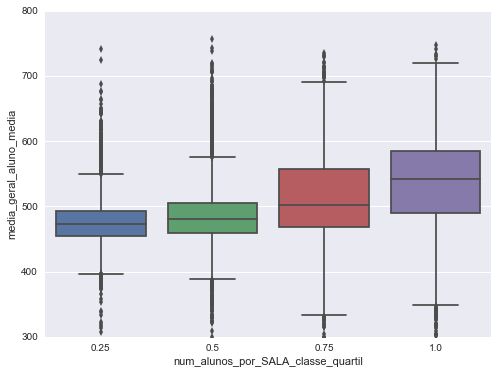

In [38]:
pred = 'num_alunos_por_SALA_classe_quartil'
data = pd.concat([df_analise_escolas['media_geral_aluno_media'], df_analise_escolas[pred]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=pred, y="media_geral_aluno_media", data=data)
fig.axis(ymin=300, ymax=800)

(-0.5, 3.5, 300, 800)

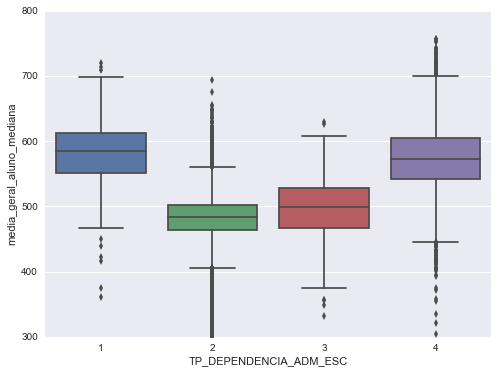

In [39]:
pred = 'TP_DEPENDENCIA_ADM_ESC'
data = pd.concat([df_analise_escolas['media_geral_aluno_mediana'], df_analise_escolas[pred]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=pred, y="media_geral_aluno_mediana", data=data)
fig.axis(ymin=300, ymax=800)

(-0.5, 1.5, 300, 800)

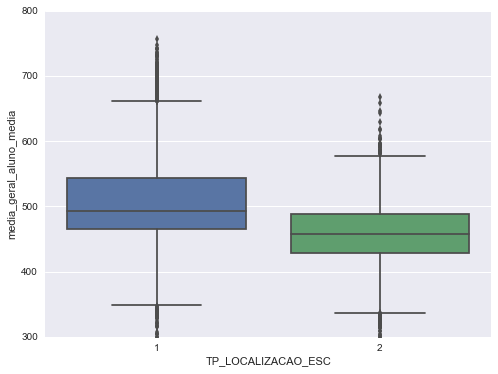

In [41]:
pred = 'TP_LOCALIZACAO_ESC'
data = pd.concat([df_analise_escolas['media_geral_aluno_media'], df_analise_escolas[pred]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=pred, y="media_geral_aluno_media", data=data)
fig.axis(ymin=300, ymax=800)

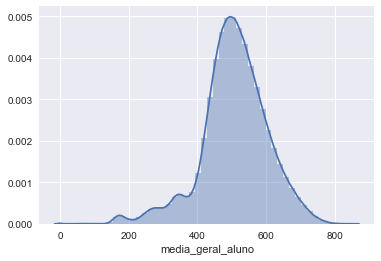

In [45]:
df_enem_microdados_2017 = pd.read_pickle('pickles/df_enem_microdados_2017_pickle')
sns.distplot(df_enem_microdados_2017['media_geral_aluno'])

In [46]:
list(df_enem_microdados_2017)

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICA

## 1. Indicadores de estrutura da escola

##### Variáveis selecionadas para compor o Índice de Estrutura da Escola:
###### Componente 1: Estrutura Pedagógica:
      - in_qualif_docente_media
      - num_alunos_por_SALA
      - NU_FUNCIONARIOS_por_aluno
      - IN_QUADRA_ESPORTES_COBERTA
      - IN_BIBLIOTECA

###### Componente 2: Estrutura Básica:
      - IN_AGUA_FILTRADA
      - IN_ENERGIA_REDE_PUBLICA
      - IN_ESGOTO_REDE_PUBLICA
      - IN_LIXO_COLETA_PERIODICA
      - IN_BANHEIRO_DENTRO_PREDIO

###### Componente 3: Estrutura Tecnológica:
      - NU_COMP_ALUNO_por_aluno
      - NU_EQUIP_MULTIMIDIA_por_aluno
      - IN_INTERNET
      - IN_LABORATORIO_CIENCIAS
      - IN_LABORATORIO_INFORMATICA


##### Criando componentes do índice:

In [47]:
df_analise_escolas["IEE_Comp_1"] = df_analise_escolas["IN_BIBLIOTECA"] + df_analise_escolas["in_qualif_docente_media_classe_quartil"] + df_analise_escolas["num_alunos_por_SALA_classe_quartil"] + df_analise_escolas["NU_FUNCIONARIOS_por_aluno_classe_quartil"] + df_analise_escolas["IN_QUADRA_ESPORTES_COBERTA"]

In [48]:
df_analise_escolas["IEE_Comp_2"] = df_analise_escolas["IN_AGUA_FILTRADA"] + df_analise_escolas["IN_ENERGIA_REDE_PUBLICA"] + df_analise_escolas["IN_ESGOTO_REDE_PUBLICA"] + df_analise_escolas["IN_LIXO_COLETA_PERIODICA"] + df_analise_escolas["IN_BANHEIRO_DENTRO_PREDIO"]

In [49]:
df_analise_escolas["IEE_Comp_3"] = df_analise_escolas["NU_COMP_ALUNO_por_aluno_classe_quartil"] + df_analise_escolas["IN_LABORATORIO_CIENCIAS"] + df_analise_escolas["IN_LABORATORIO_INFORMATICA"] + df_analise_escolas["NU_COMP_ALUNO_por_aluno_classe_quartil"] + df_analise_escolas["NU_EQUIP_MULTIMIDIA_por_aluno_classe_quartil"]

In [80]:
df_analise_escolas["IEE"] = df_analise_escolas["IEE_Comp_1"] + df_analise_escolas["IEE_Comp_2"] + df_analise_escolas["IEE_Comp_3"]
quartis = df_analise_escolas['IEE'].describe()[[4,5,6]].tolist()
df_analise_escolas['IEE_classe_quartil'] = df_analise_escolas['IEE'].map(classe_quartil)

In [81]:
# criando 6 faixas de valor no IEE
def faixa_valor_IEE (x):
    if x < 5:
        y = 'a. menor que 5'
    elif x < 7.5:
        y = 'b. de 5 a 7,5'
    elif x < 10:
        y = 'c. de 7,5 a 10'
    elif x < 12.5:
        y = 'd. de 10 a 12,5'
    else:
        y = 'e. de 12,5 a 15'
    return y

df_analise_escolas['faixa_valor_IEE'] = df_analise_escolas['IEE'].map(faixa_valor_IEE)

In [82]:
df_analise_escolas.sort_values('IEE', ascending = True)

,CO_ESCOLA,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,media_objetivas_aluno_media,media_objetivas_aluno_mediana,media_geral_aluno_media,media_geral_aluno_mediana,...,NU_EQUIP_MULTIMIDIA_por_aluno_classe_quartil,NU_FUNCIONARIOS_por_aluno_classe_quartil,percentual_de_salas_utilizadas_classe_quartil,num_alunos_por_SALA_classe_quartil,IEE_Comp_1,IEE_Comp_2,IEE_Comp_3,IEE,IEE_classe_quartil,faixa_valor_IEE
310,12023361,12,AC,2,2,2,472.366667,491.3500,487.226667,489.08,...,0.25,0.25,0.50,1.00,1.50,0.0,0.75,2.25,0.25,a. menor que 5
2726,21276854,21,MA,2,2,1,443.750000,444.3750,444.000000,449.50,...,0.25,0.50,0.50,0.75,1.50,0.0,0.75,2.25,0.25,a. menor que 5
2843,21371202,21,MA,2,2,1,407.850000,407.8500,418.280000,418.28,...,0.25,0.25,0.50,0.25,0.75,1.0,0.75,2.50,0.25,a. menor que 5
24002,43108318,43,RS,2,1,1,452.916346,490.4250,451.563846,486.41,...,0.25,0.50,0.25,0.25,1.00,1.0,0.75,2.75,0.25,a. menor que 5
23924,43105203,43,RS,2,1,1,507.242391,523.2500,507.781491,520.56,...,0.25,0.25,0.25,0.25,1.00,1.0,0.75,2.75,0.25,a. menor que 5
800,14322412,14,RR,2,2,1,431.962500,431.9625,433.570000,433.57,...,0.25,0.75,1.00,1.00,2.00,0.0,0.75,2.75,0.25,a. menor que 5
1050,15055906,15,PA,2,2,1,469.981250,476.5125,487.985000,505.21,...,0.75,0.25,0.25,0.25,0.75,1.0,1.25,3.00,0.25,a. menor que 5
2926,22014160,22,PI,2,1,1,481.380357,462.6250,484.532857,469.78,...,0.25,0.50,0.50,0.50,1.25,1.0,0.75,3.00,0.25,a. menor que 5
236,12004120,12,AC,2,2,1,412.595833,430.0625,415.076667,441.68,...,0.25,0.25,0.50,0.75,1.25,1.0,0.75,3.00,0.25,a. menor que 5
721,14000822,14,RR,2,2,1,467.450000,467.4500,455.960000,455.96,...,0.25,1.00,1.00,1.00,2.25,0.0,0.75,3.00,0.25,a. menor que 5


In [83]:
list(df_analise_escolas)

['CO_ESCOLA',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'media_objetivas_aluno_media',
 'media_objetivas_aluno_mediana',
 'media_geral_aluno_media',
 'media_geral_aluno_mediana',
 'nota_matematica_media',
 'nota_matematica_mediana',
 'nota_redacao_media',
 'nota_redacao_mediana',
 'renda_per_capita_media',
 'renda_per_capita_mediana',
 'numero_de_alunos_enem',
 'num_alunos_acima_600',
 'num_alunos_acima_700',
 'percentual_alunos_acima_600',
 'percentual_alunos_acima_700',
 'CO_ESCOLA_int',
 'CO_ENTIDADE',
 'TP_SITUACAO_FUNCIONAMENTO',
 'CO_UF_x',
 'CO_MUNICIPIO',
 'TP_DEPENDENCIA',
 'TP_LOCALIZACAO',
 'IN_AGUA_FILTRADA',
 'IN_AGUA_REDE_PUBLICA',
 'IN_AGUA_POCO_ARTESIANO',
 'IN_AGUA_CACIMBA',
 'IN_AGUA_FONTE_RIO',
 'IN_AGUA_INEXISTENTE',
 'IN_ENERGIA_REDE_PUBLICA',
 'IN_ENERGIA_GERADOR',
 'IN_ENERGIA_OUTROS',
 'IN_ENERGIA_INEXISTENTE',
 'IN_ESGOTO_REDE_PUBLICA',
 'IN_ESGOTO_FOSSA',
 'IN_ESGOTO_INEXISTENTE',
 'IN_LIXO_COLETA_PERIOD

## 2. Criando base pro modelo do aluno

In [84]:
df_alunos_escolas = df_enem_microdados_2017.merge(df_analise_escolas, how = 'inner', left_on = 'CO_ESCOLA', right_on = 'CO_ESCOLA')

In [85]:
list(df_alunos_escolas)

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC_x',
 'SG_UF_ESC_x',
 'TP_DEPENDENCIA_ADM_ESC_x',
 'TP_LOCALIZACAO_ESC_x',
 'TP_SIT_FUNC_ESC_x',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_

In [86]:
lista_variaveis_modelo_1 = ['NU_INSCRICAO',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_ST_CONCLUSAO',
 'TP_ENSINO',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_ESC',
 'SG_UF_ESC_x',
 'TP_DEPENDENCIA_ADM_ESC_x',
 'TP_LOCALIZACAO_ESC_x',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'CO_MUNICIPIO_PROVA',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',                     
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'Q026',                       
 'Q027\n',
 'faixa_renda',
 'renda_per_capita',

 'IN_AGUA_REDE_PUBLICA',
 'IN_AGUA_INEXISTENTE',
 'IN_ENERGIA_REDE_PUBLICA',
 'IN_ENERGIA_INEXISTENTE',
 'IN_ESGOTO_REDE_PUBLICA',
 'IN_ESGOTO_INEXISTENTE',
 'IN_LIXO_COLETA_PERIODICA',
 'IN_SALA_DIRETORIA',
 'IN_SALA_PROFESSOR',
 'IN_LABORATORIO_INFORMATICA',
 'IN_LABORATORIO_CIENCIAS',
 'IN_QUADRA_ESPORTES_COBERTA',
 'IN_QUADRA_ESPORTES_DESCOBERTA',
 'IN_COZINHA',
 'IN_BIBLIOTECA',
 'IN_SALA_LEITURA',
 'IN_PARQUE_INFANTIL',
 'IN_BANHEIRO_DENTRO_PREDIO',
 'IN_REFEITORIO',
 'IN_DESPENSA',
 'IN_ALMOXARIFADO',
 'IN_AUDITORIO',
 'IN_PATIO_COBERTO',
 'IN_INTERNET',
 'IN_BANDA_LARGA',
 'renda_per_capita_media_classe_quartil', 
 'in_qualif_docente_media_classe_quartil',
 'NU_COMP_ALUNO_por_aluno_classe_quartil',
 'NU_EQUIP_MULTIMIDIA_por_aluno_classe_quartil',
 'NU_FUNCIONARIOS_por_aluno_classe_quartil',
 'percentual_de_salas_utilizadas_classe_quartil',
 'num_alunos_por_SALA_classe_quartil',
 'faixa_valor_IEE',
                            
 'media_geral_aluno',
 'dummy_600']

In [87]:
len(lista_variaveis_modelo_1)

89

In [88]:
df_alunos_escolas_modelo = df_alunos_escolas[lista_variaveis_modelo_1]

In [89]:
df_alunos_escolas_modelo.to_pickle('df_alunos_escolas_modelo_pickle')